# CONCATENATING DIFFERENT DATASETS

In [ ]:
import pandas as pd
import glob

# Get list of all CSV files
csv_files = sorted(glob.glob("/mnt/data/ev_charging_dataset/*.csv"))

# Concatenate all CSV files into a single DataFrame
df_all = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined DataFrame to a single CSV file
combined_csv_path = "/mnt/data/ev_charging_data_combined.csv"
df_all.to_csv(combined_csv_path, index=False)

combined_csv_path


In [3]:

import pandas as pd
df=pd.read_csv("ev_charging_data_combined.csv")
df

,Charger_ID,Vehicle_ID,Energy_kWh,Duration_min,Source,Fleet_ID
0,CH007,EV040,25.385343,59.129264,EVSE,NaN
1,CH007,EV014,30.666573,54.493982,EVSE,NaN
2,CH007,EV040,28.237143,28.738664,EVSE,NaN
3,CH007,EV014,42.008928,44.087380,EVSE,NaN
4,CH007,EV040,36.983989,78.611688,EVSE,NaN
...,...,...,...,...,...,...
14928,CH011,EV023,172.710205,75.982211,EVSE,NaN
14929,CH011,EV034,28.151282,69.542996,EVSE,NaN
14930,CH011,EV004,30.760124,103.829829,EVSE,NaN
14931,CH011,EV004,16.423317,83.212476,NaN,NaN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14933 entries, 0 to 14932
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Charger_ID    14184 non-null  object 
 1   Vehicle_ID    14184 non-null  object 
 2   Energy_kWh    14184 non-null  float64
 3   Duration_min  14184 non-null  float64
 4   Source        14184 non-null  object 
 5   Fleet_ID      4304 non-null   object 
dtypes: float64(2), object(4)
memory usage: 700.1+ KB


In [111]:
df.count()

Charger_ID      14184
Vehicle_ID      14184
Energy_kWh      14184
Duration_min    14184
Source          14184
Fleet_ID         4304
dtype: int64

In [112]:
import numpy as np
np.count_nonzero(df.isnull())

14374

In [113]:
cnts_chargerId=df.Charger_ID.value_counts(dropna=False, normalize=True)
cnts_chargerId

Charger_ID
NaN      0.050157
CH029    0.046608
CH021    0.039510
CH014    0.037568
CH028    0.036898
CH030    0.036228
CH001    0.035894
CH027    0.035626
CH008    0.035492
CH026    0.035090
CH022    0.034889
CH024    0.034019
CH011    0.034019
CH002    0.033081
CH023    0.032679
CH003    0.032278
CH020    0.032144
CH017    0.031072
CH013    0.030269
CH012    0.030269
CH018    0.029800
CH010    0.028862
CH007    0.028460
CH015    0.028126
CH009    0.026385
CH006    0.026251
CH005    0.025112
CH019    0.024978
CH004    0.024576
CH025    0.022367
CH016    0.021295
Name: proportion, dtype: float64

In [114]:
cnts_vehicleId=df.Vehicle_ID.value_counts(dropna=False, normalize=True)
cnts_vehicleId

Vehicle_ID
NaN      0.050157
EV002    0.040313
EV029    0.033148
EV033    0.028929
EV037    0.028527
EV013    0.026318
EV049    0.025916
EV038    0.025514
EV042    0.024509
EV025    0.023572
EV035    0.023371
EV041    0.023237
EV019    0.022634
EV001    0.021563
EV030    0.021295
EV047    0.020893
EV014    0.020759
EV017    0.020023
EV006    0.019688
EV023    0.019353
EV011    0.019152
EV028    0.018884
EV027    0.018483
EV003    0.018282
EV040    0.018148
EV016    0.018148
EV012    0.018014
EV021    0.017947
EV007    0.017679
EV032    0.017545
EV043    0.017478
EV024    0.017009
EV020    0.016875
EV039    0.016808
EV036    0.016741
EV046    0.015804
EV026    0.015536
EV008    0.015134
EV045    0.015067
EV044    0.014130
EV004    0.013862
EV009    0.013795
EV031    0.013728
EV034    0.013661
EV005    0.013594
EV022    0.012857
EV048    0.012857
EV010    0.011384
EV018    0.011317
EV015    0.010848
EV050    0.009509
Name: proportion, dtype: float64

In [64]:
cnts_Source=df.Source.value_counts(dropna=False, normalize=True)
cnts_Source

Source
EVSE        0.352977
Vehicle     0.308645
Submeter    0.288221
NaN         0.050157
Name: proportion, dtype: float64

In [115]:
cnts_FleetId = df.loc[df['Source'] == 'Submeter', 'Fleet_ID'].value_counts(dropna=False, normalize=True)
cnts_FleetId


Fleet_ID
Fleet03    0.345260
Fleet01    0.315985
Fleet02    0.286942
NaN        0.051812
Name: proportion, dtype: float64

1. EVSE (Electric Vehicle Supply Equipment)
✅ What it is:
EVSE refers to the charging hardware—the actual charging stations or ports that supply electrical energy to EVs.

📡 What it records:
Energy dispensed (kWh)

Charging duration

Session timestamps

Sometimes limited vehicle interaction data

📈 Data Characteristics:
High accuracy

High-frequency sampling

Precise charger tracking (Charger ID)

Sometimes cannot pinpoint which vehicle was being charged unless integrated with vehicle ID systems

🧠 Think of it like:
The pump at a gas station—it knows how much it dispensed, when, and for how long, but not always what car was filled.

🚗 2. Vehicle Onboard Systems
✅ What it is:
Data collected from the vehicle’s internal battery management system (BMS) or onboard telemetry.

📡 What it records:
Energy received

Battery status before/after charging

Estimated range

Time and date of charging

Sometimes GPS location

📉 Data Characteristics:
May not know which charger was used

Very accurate on vehicle-level metrics

Ideal for user-centric analysis (driver behavior, battery health)

🧠 Think of it like:
The car’s brain reporting what it received, how much, and how it was affected—but it doesn’t always know who gave it the power.

⚙️ 3. Utility Submeters
✅ What it is:
A secondary meter installed to monitor power consumption from one or more EV chargers, often at a building or depot level.

📡 What it records:
Total energy consumption over time (aggregated)

Sometimes peak demand

Often no session-level detail

📉 Data Characteristics:
Low resolution

Cannot distinguish individual vehicles or chargers

Useful for fleet-level monitoring, billing, and infrastructure planning

🧠 Think of it like:
A power meter outside a house—it tells how much electricity was used overall, but not which appliance (or EV) used how much.


# DATA CLEANING

In [116]:
# Apply forward fill only where Source is 'Submeter'
mask = df['Source'] == 'Submeter'

# Forward fill only on the Submeter subset
df.loc[mask, 'Fleet_ID'] = df.loc[mask, 'Fleet_ID'].ffill()

In [117]:
cnts_FleetId_cleaned=df.Fleet_ID.value_counts(dropna=True, normalize=True)
cnts_FleetId_cleaned

Fleet_ID
Fleet03    0.366468
Fleet01    0.330903
Fleet02    0.302629
Name: proportion, dtype: float64

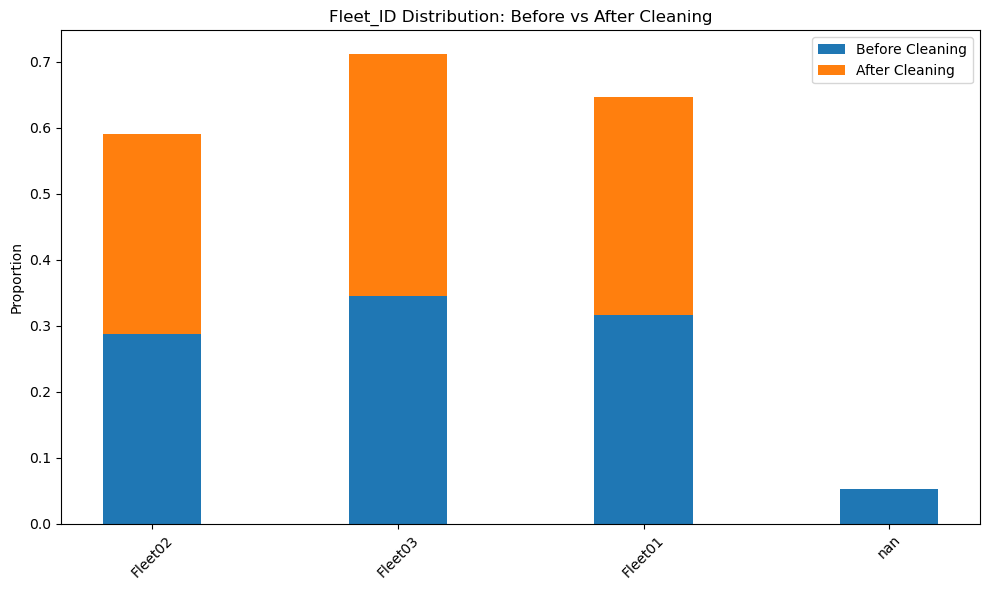

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Align both series on all fleet labels
labels = list(set(cnts_FleetId.index).union(set(cnts_FleetId_cleaned.index)))
before = cnts_FleetId.reindex(labels, fill_value=0)
after = cnts_FleetId_cleaned.reindex(labels, fill_value=0)

x = range(len(labels))

plt.figure(figsize=(10, 6))

# Stacked bar chart: before and after stacked
plt.bar(x, before, width=0.4, label='Before Cleaning')
plt.bar(x, after, width=0.4, bottom=before, label='After Cleaning')

plt.xticks(x, labels, rotation=45)
plt.ylabel("Proportion")
plt.title("Fleet_ID Distribution: Before vs After Cleaning")
plt.legend()
plt.tight_layout()
plt.show()




In [119]:
# Forward fill only on the Source subset
df.loc[:, 'Source'] = df.loc[:, 'Source'].ffill()


In [120]:
cnts_Source_cleaned=df.Source.value_counts(dropna=True, normalize=True)
cnts_Source_cleaned

Source
EVSE        0.371325
Vehicle     0.324851
Submeter    0.303824
Name: proportion, dtype: float64

range(0, 4)


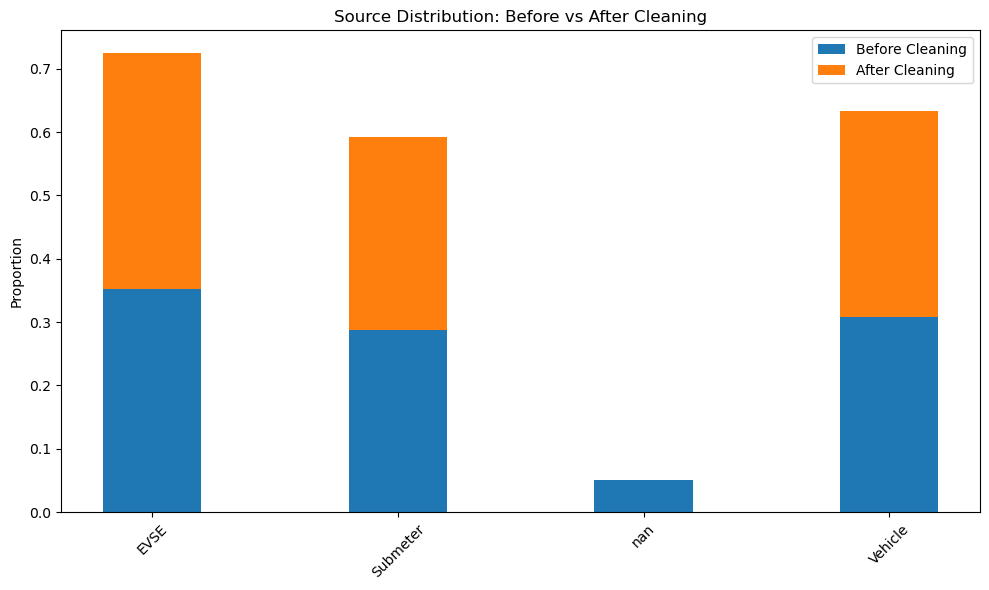

In [121]:
# Align both series on all fleet labels
labels = list(set(cnts_Source.index).union(set(cnts_Source_cleaned.index)))
before = cnts_Source.reindex(labels, fill_value=0)
after = cnts_Source_cleaned.reindex(labels, fill_value=0)

x = range(len(labels))
print(x)
plt.figure(figsize=(10, 6))

# Stacked bar chart: before and after stacked
plt.bar(x, before, width=0.4, label='Before Cleaning')
plt.bar(x, after, width=0.4, bottom=before, label='After Cleaning')

plt.xticks(x, labels, rotation=45)
plt.ylabel("Proportion")
plt.title("Source Distribution: Before vs After Cleaning")
plt.legend()
plt.tight_layout()
plt.show()

In [122]:
cnts_chargerId

Charger_ID
NaN      0.050157
CH029    0.046608
CH021    0.039510
CH014    0.037568
CH028    0.036898
CH030    0.036228
CH001    0.035894
CH027    0.035626
CH008    0.035492
CH026    0.035090
CH022    0.034889
CH024    0.034019
CH011    0.034019
CH002    0.033081
CH023    0.032679
CH003    0.032278
CH020    0.032144
CH017    0.031072
CH013    0.030269
CH012    0.030269
CH018    0.029800
CH010    0.028862
CH007    0.028460
CH015    0.028126
CH009    0.026385
CH006    0.026251
CH005    0.025112
CH019    0.024978
CH004    0.024576
CH025    0.022367
CH016    0.021295
Name: proportion, dtype: float64

In [123]:

# Forward fill only on the Source subset
cnts_chargerId_Cleaned= df.loc[:, 'Charger_ID'] = df.loc[:, 'Charger_ID'].ffill()


In [124]:
cnts_chargerId_Cleaned.value_counts(dropna=False, normalize=True)

Charger_ID
CH029    0.049354
CH021    0.041519
CH014    0.039845
CH028    0.039108
CH030    0.038505
CH001    0.037970
CH008    0.037702
CH027    0.037300
CH022    0.036898
CH026    0.036095
CH011    0.035693
CH024    0.035693
CH002    0.034889
CH003    0.034353
CH023    0.034220
CH020    0.033617
CH017    0.033081
CH013    0.031742
CH012    0.031675
CH018    0.031407
CH010    0.030068
CH007    0.029867
CH015    0.029532
CH009    0.027590
CH006    0.027255
CH019    0.026652
CH005    0.026585
CH004    0.025916
CH025    0.023371
CH016    0.022501
Name: proportion, dtype: float64

In [125]:
cnts_vehicleId

Vehicle_ID
NaN      0.050157
EV002    0.040313
EV029    0.033148
EV033    0.028929
EV037    0.028527
EV013    0.026318
EV049    0.025916
EV038    0.025514
EV042    0.024509
EV025    0.023572
EV035    0.023371
EV041    0.023237
EV019    0.022634
EV001    0.021563
EV030    0.021295
EV047    0.020893
EV014    0.020759
EV017    0.020023
EV006    0.019688
EV023    0.019353
EV011    0.019152
EV028    0.018884
EV027    0.018483
EV003    0.018282
EV040    0.018148
EV016    0.018148
EV012    0.018014
EV021    0.017947
EV007    0.017679
EV032    0.017545
EV043    0.017478
EV024    0.017009
EV020    0.016875
EV039    0.016808
EV036    0.016741
EV046    0.015804
EV026    0.015536
EV008    0.015134
EV045    0.015067
EV044    0.014130
EV004    0.013862
EV009    0.013795
EV031    0.013728
EV034    0.013661
EV005    0.013594
EV022    0.012857
EV048    0.012857
EV010    0.011384
EV018    0.011317
EV015    0.010848
EV050    0.009509
Name: proportion, dtype: float64

In [126]:
# Forward fill only on the VehicleId subset
cnts_vehicleId_Cleaned= df.loc[:, 'Vehicle_ID'] = df.loc[:, 'Vehicle_ID'].ffill()


In [127]:
# Forward fill only on the VehicleId subset
cnts_vehicleId_Cleaned.value_counts(dropna=False, normalize=True)

Vehicle_ID
EV002    0.042523
EV029    0.035090
EV033    0.030536
EV037    0.030202
EV013    0.027858
EV049    0.027322
EV038    0.026719
EV042    0.025916
EV025    0.024844
EV035    0.024443
EV041    0.024175
EV019    0.023907
EV030    0.022501
EV001    0.022501
EV047    0.022032
EV014    0.021898
EV017    0.021027
EV006    0.020893
EV023    0.020224
EV011    0.020157
EV028    0.019889
EV027    0.019152
EV003    0.019085
EV016    0.019085
EV021    0.019018
EV040    0.019018
EV012    0.019018
EV043    0.018683
EV007    0.018550
EV032    0.018483
EV024    0.018215
EV039    0.017880
EV020    0.017746
EV036    0.017679
EV046    0.016608
EV026    0.016273
EV045    0.015804
EV008    0.015737
EV044    0.014799
EV034    0.014599
EV009    0.014398
EV005    0.014331
EV004    0.014331
EV031    0.014264
EV022    0.013460
EV048    0.013326
EV018    0.012121
EV010    0.011853
EV015    0.011652
EV050    0.010179
Name: proportion, dtype: float64

In [128]:
cnts_EnergyKwh=df.loc[:, 'Energy_kWh'].isna().sum()

In [129]:
print("Number of Missing Values in Energy_kWh =", cnts_EnergyKwh)

Number of Missing Values in Energy_kWh = 749


In [130]:
median_Energy=df.loc[:, 'Energy_kWh'].median()
cnts_EnergyKwh_cleaned=df.loc[:, 'Energy_kWh']=df.loc[:, 'Energy_kWh'].fillna(median_Energy)
cnts_EnergyKwh_cleaned

0         25.385343
1         30.666573
2         28.237143
3         42.008928
4         36.983989
            ...    
14928    172.710205
14929     28.151282
14930     30.760124
14931     16.423317
14932     27.690663
Name: Energy_kWh, Length: 14933, dtype: float64

In [135]:
cnts_Duration=df.loc[:, 'Duration_min'].isna().sum()

In [136]:
print("Number of Missing Values in Duration column =", cnts_Duration)

Number of Missing Values in Duration column = 749


In [142]:
median_Duration=df.loc[:, 'Duration_min'].median()
cnts_Duration_cleaned=df.loc[:, 'Duration_min']=df.loc[:, 'Duration_min'].fillna(median_Duration)
cnts_Duration_cleaned

0         59.129264
1         54.493982
2         28.738664
3         44.087380
4         78.611688
            ...    
14928     75.982211
14929     69.542996
14930    103.829829
14931     83.212476
14932     58.349309
Name: Duration_min, Length: 14933, dtype: float64

In [143]:
df.info('Duration_min')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14933 entries, 0 to 14932
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Charger_ID    14933 non-null  object 
 1   Vehicle_ID    14933 non-null  object 
 2   Energy_kWh    14933 non-null  float64
 3   Duration_min  14933 non-null  float64
 4   Source        14933 non-null  object 
 5   Fleet_ID      4527 non-null   object 
dtypes: float64(2), object(4)
memory usage: 700.1+ KB


In [144]:
df

,Charger_ID,Vehicle_ID,Energy_kWh,Duration_min,Source,Fleet_ID
0,CH007,EV040,25.385343,59.129264,EVSE,NaN
1,CH007,EV014,30.666573,54.493982,EVSE,NaN
2,CH007,EV040,28.237143,28.738664,EVSE,NaN
3,CH007,EV014,42.008928,44.087380,EVSE,NaN
4,CH007,EV040,36.983989,78.611688,EVSE,NaN
...,...,...,...,...,...,...
14928,CH011,EV023,172.710205,75.982211,EVSE,NaN
14929,CH011,EV034,28.151282,69.542996,EVSE,NaN
14930,CH011,EV004,30.760124,103.829829,EVSE,NaN
14931,CH011,EV004,16.423317,83.212476,EVSE,NaN


In [145]:
df.to_csv('ev_charging_data_cleaned.csv',index=False)

# DATA FILTERING

In [4]:
import pandas as pd
ev_cleaned=pd.read_csv('ev_charging_data_cleaned.csv')
ev_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14933 entries, 0 to 14932
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Charger_ID    14933 non-null  object 
 1   Vehicle_ID    14933 non-null  object 
 2   Energy_kWh    14933 non-null  float64
 3   Duration_min  14933 non-null  float64
 4   Source        14933 non-null  object 
 5   Fleet_ID      4527 non-null   object 
dtypes: float64(2), object(4)
memory usage: 700.1+ KB


In [3]:
ev_cleaned.isna().sum()

Charger_ID          0
Vehicle_ID          0
Energy_kWh          0
Duration_min        0
Source              0
Fleet_ID        10406
dtype: int64

In [4]:
ev_cleaned.isna().value_counts()

Charger_ID  Vehicle_ID  Energy_kWh  Duration_min  Source  Fleet_ID
False       False       False       False         False   True        10406
                                                          False        4527
Name: count, dtype: int64

In [5]:
# Split by source
evse_df = ev_cleaned[ev_cleaned['Source'] == 'EVSE'].copy()
submeter_df = ev_cleaned[ev_cleaned['Source'] == 'Submeter'].copy()
vehicle_df = ev_cleaned[ev_cleaned['Source'] == 'Vehicle'].copy()

# Confirm the sizes
print("EVSE data shape:", evse_df.shape)
print("Submeter data shape:", submeter_df.shape)
print("Vehicle data shape:", vehicle_df.shape)


EVSE data shape: (5545, 6)
Submeter data shape: (4537, 6)
Vehicle data shape: (4851, 6)


# 1. EVSE (Electric Vehicle Supply Equipment)
✅ What it is:
EVSE refers to the charging hardware—the actual charging stations or ports that supply electrical energy to EVs.

📡 What it records:
Energy dispensed (kWh)

Charging duration

Session timestamps

Sometimes limited vehicle interaction data

📈 Data Characteristics:
High accuracy

High-frequency sampling

Precise charger tracking (Charger ID)

Sometimes cannot pinpoint which vehicle was being charged unless integrated with vehicle ID systems

🧠 Think of it like:
The pump at a gas station—it knows how much it dispensed, when, and for how long, but not always what car was filled.

In [6]:

evse_df

,Charger_ID,Vehicle_ID,Energy_kWh,Duration_min,Source,Fleet_ID
0,CH007,EV040,25.385343,59.129264,EVSE,NaN
1,CH007,EV014,30.666573,54.493982,EVSE,NaN
2,CH007,EV040,28.237143,28.738664,EVSE,NaN
3,CH007,EV014,42.008928,44.087380,EVSE,NaN
4,CH007,EV040,36.983989,78.611688,EVSE,NaN
...,...,...,...,...,...,...
14928,CH011,EV023,172.710205,75.982211,EVSE,NaN
14929,CH011,EV034,28.151282,69.542996,EVSE,NaN
14930,CH011,EV004,30.760124,103.829829,EVSE,NaN
14931,CH011,EV004,16.423317,83.212476,EVSE,NaN


In [6]:
# Drop Fleet_ID from EVSE and Vehicle DataFrames since it contains nan values
evse_df.drop(columns=['Fleet_ID'], inplace=True)
vehicle_df.drop(columns=['Fleet_ID'], inplace=True)


In [7]:
# Confirm the sizes
print("EVSE data shape:", evse_df.shape)
print("Submeter data shape:", submeter_df.shape)
print("Vehicle data shape:", vehicle_df.shape)

EVSE data shape: (5545, 5)
Submeter data shape: (4537, 6)
Vehicle data shape: (4851, 5)


In [53]:
evse_df

,Charger_ID,Vehicle_ID,Energy_kWh,Duration_min,Source,Efficiency_kWh_per_min
0,CH007,EV040,25.385343,59.129264,EVSE,0.429319
1,CH007,EV014,30.666573,54.493982,EVSE,0.562752
2,CH007,EV040,28.237143,28.738664,EVSE,0.982549
3,CH007,EV014,42.008928,44.087380,EVSE,0.952856
4,CH007,EV040,36.983989,78.611688,EVSE,0.470464
...,...,...,...,...,...,...
14928,CH011,EV023,172.710205,75.982211,EVSE,2.273035
14929,CH011,EV034,28.151282,69.542996,EVSE,0.404804
14930,CH011,EV004,30.760124,103.829829,EVSE,0.296255
14931,CH011,EV004,16.423317,83.212476,EVSE,0.197366


In [11]:
avg_energy = evse_df['Energy_kWh'].mean()
print(f"Average Energy per Session: {avg_energy:.2f} kWh")


Average Energy per Session: 32.19 kWh


## Removing OutLiers From Energy and Duration Column

In [9]:

Q1 = evse_df['Duration_min'].quantile(0.25)
Q3 = evse_df['Duration_min'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = evse_df[(evse_df['Duration_min'] < lower_bound) | (evse_df['Duration_min'] > upper_bound)]

print(f"Number of Outliers in Duration: {len(outliers)}")


Number of Outliers in Duration: 58


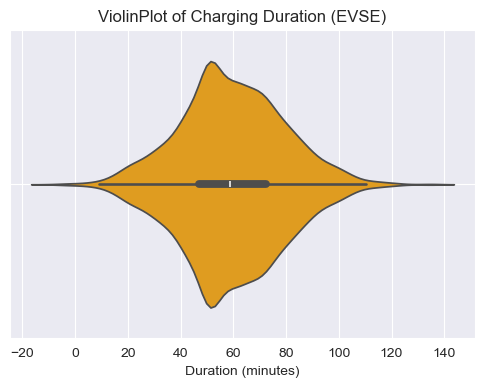

In [10]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.violinplot(x=evse_df['Duration_min'], color='orange')
plt.title('ViolinPlot of Charging Duration (EVSE)')
plt.xlabel('Duration (minutes)')
plt.grid(True)
plt.show()


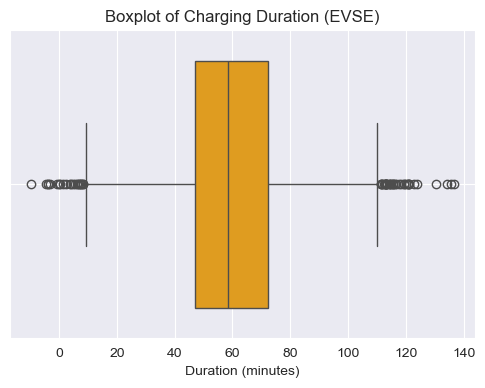

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x=evse_df['Duration_min'], color='orange')
plt.title('Boxplot of Charging Duration (EVSE)')
plt.xlabel('Duration (minutes)')
plt.grid(True)
plt.show()


In [12]:
# Remove outliers from the dataset
evse_df_cleaned = evse_df[(evse_df['Duration_min'] >= lower_bound) & (evse_df['Duration_min'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of Outliers Removed: {len(outliers)}")

# Check the new dataset
print(f"Shape of dataset after removal: {evse_df_cleaned.shape}")



Number of Outliers Removed: 58
Shape of dataset after removal: (5487, 5)


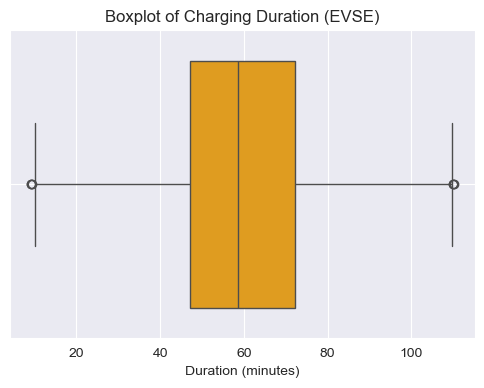

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x=evse_df_cleaned['Duration_min'], color='orange')
plt.title('Boxplot of Charging Duration (EVSE)')
plt.xlabel('Duration (minutes)')
plt.grid(True)
plt.show()


In [14]:
Q1 = evse_df['Energy_kWh'].quantile(0.25)
Q3 = evse_df['Energy_kWh'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = evse_df[(evse_df['Energy_kWh'] < lower_bound) | (evse_df['Energy_kWh'] > upper_bound)]

print(f"Number of Outliers in Energy_kWh: {len(outliers)}")

Number of Outliers in Energy_kWh: 173


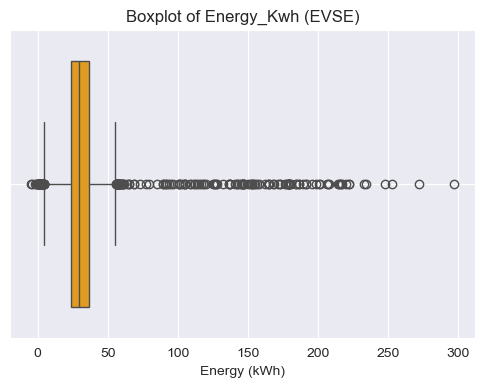

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=evse_df['Energy_kWh'], color='orange')
plt.title('Boxplot of Energy_Kwh (EVSE)')
plt.xlabel('Energy (kWh)')
plt.grid(True)
plt.show()

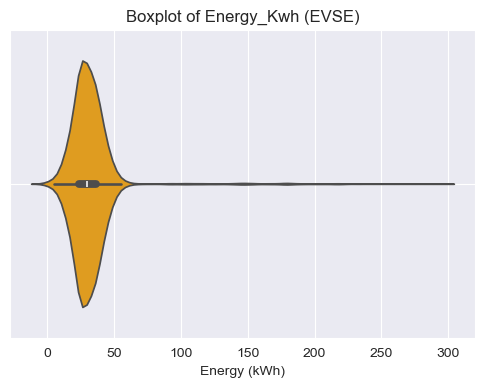

In [16]:
plt.figure(figsize=(6,4))
sns.violinplot(x=evse_df['Energy_kWh'], color='orange')
plt.title('Boxplot of Energy_Kwh (EVSE)')
plt.xlabel('Energy (kWh)')
plt.grid(True)
plt.show()

In [17]:
# Remove outliers from the dataset
evse_df_cleaned = evse_df[(evse_df['Energy_kWh'] >= lower_bound) & (evse_df['Energy_kWh'] <= upper_bound)]

# Print the number of outliers removed
print(f"Number of Outliers Removed: {len(outliers)}")

# Check the new dataset
print(f"Shape of dataset after removal: {evse_df_cleaned.shape}")


Number of Outliers Removed: 173
Shape of dataset after removal: (5372, 5)


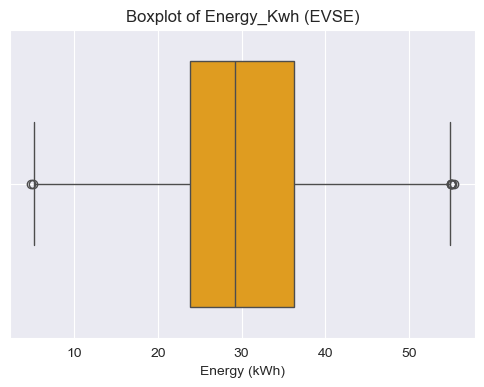

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=evse_df_cleaned['Energy_kWh'], color='orange')
plt.title('Boxplot of Energy_Kwh (EVSE)')
plt.xlabel('Energy (kWh)')
plt.grid(True)
plt.show()

In [19]:

most_used = evse_df_cleaned['Charger_ID'].value_counts().head(10)
print("Top 10 Most Used Chargers:\n", most_used)


Top 10 Most Used Chargers:
 Charger_ID
CH029    391
CH021    276
CH028    257
CH030    256
CH002    252
CH027    242
CH023    234
CH012    233
CH001    232
CH017    224
Name: count, dtype: int64


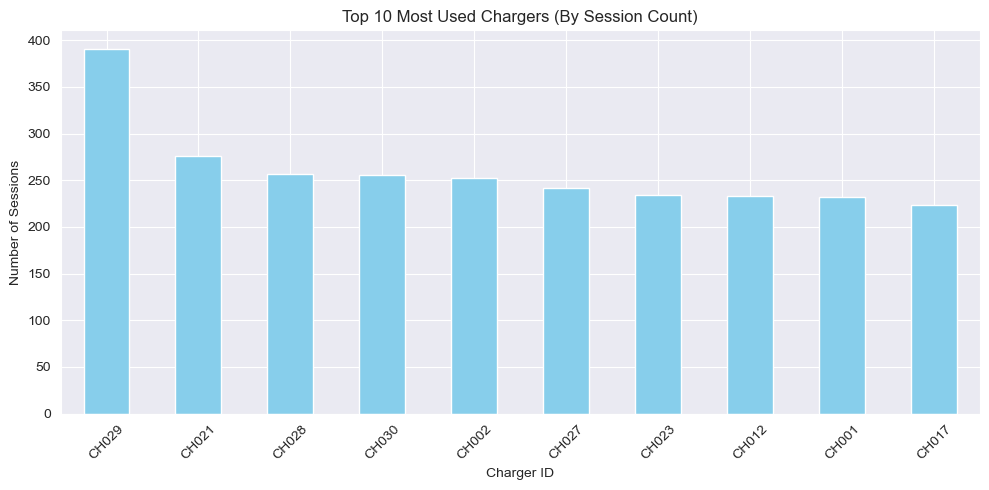

In [20]:
import matplotlib.pyplot as plt

most_used.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Top 10 Most Used Chargers (By Session Count)')
plt.xlabel('Charger ID')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
evse_df_cleaned['Efficiency_kWh_per_min'] = evse_df_cleaned['Energy_kWh'] / evse_df_cleaned['Duration_min']
evse_df_cleaned



C:\Users\jaiku\AppData\Local\Temp\ipykernel_24016\3878840874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evse_df_cleaned['Efficiency_kWh_per_min'] = evse_df_cleaned['Energy_kWh'] / evse_df_cleaned['Duration_min']


,Charger_ID,Vehicle_ID,Energy_kWh,Duration_min,Source,Efficiency_kWh_per_min
0,CH007,EV040,25.385343,59.129264,EVSE,0.429319
1,CH007,EV014,30.666573,54.493982,EVSE,0.562752
2,CH007,EV040,28.237143,28.738664,EVSE,0.982549
3,CH007,EV014,42.008928,44.087380,EVSE,0.952856
4,CH007,EV040,36.983989,78.611688,EVSE,0.470464
...,...,...,...,...,...,...
14927,CH011,EV004,35.888976,55.782728,EVSE,0.643371
14929,CH011,EV034,28.151282,69.542996,EVSE,0.404804
14930,CH011,EV004,30.760124,103.829829,EVSE,0.296255
14931,CH011,EV004,16.423317,83.212476,EVSE,0.197366


In [25]:
efficiency_stats = evse_df_cleaned.groupby('Charger_ID')['Efficiency_kWh_per_min'].mean().sort_values(ascending=False)
print(" Most Efficient Chargers (kWh per minute):\n", efficiency_stats)


 Most Efficient Chargers (kWh per minute):
 Charger_ID
CH015    1.034393
CH014    0.725256
CH025    0.682965
CH005    0.656024
CH019    0.649109
CH030    0.632632
CH018    0.620631
CH021    0.616467
CH009    0.615332
CH003    0.613568
CH022    0.605657
CH007    0.595628
CH008    0.594760
CH001    0.594431
CH002    0.586347
CH024    0.579158
CH004    0.578040
CH017    0.577334
CH010    0.576996
CH012    0.575143
CH023    0.570457
CH016    0.561594
CH020    0.552719
CH026    0.547942
CH027    0.545991
CH011    0.537708
CH029    0.526807
CH006    0.506135
CH013    0.478813
CH028   -1.013882
Name: Efficiency_kWh_per_min, dtype: float64


In [26]:
charger_performance = evse_df_cleaned.groupby('Charger_ID').agg(
    session_count=('Charger_ID', 'count'),
    avg_energy=('Energy_kWh', 'mean'),
    avg_duration=('Duration_min', 'mean'),
    avg_efficiency=('Efficiency_kWh_per_min', 'mean')
)

# Optional: Add a custom score
charger_performance['performance_score'] = charger_performance['session_count'] * charger_performance['avg_efficiency']
top_chargers = charger_performance.sort_values(by='performance_score', ascending=False).head(10)

print("Top Chargers by Overall Performance Score:\n", top_chargers)


Top Chargers by Overall Performance Score:
             session_count  avg_energy  avg_duration  avg_efficiency  \
Charger_ID                                                            
CH029                 391   29.503097     59.720255        0.526807   
CH021                 276   29.936135     58.018400        0.616467   
CH030                 256   30.175628     58.734105        0.632632   
CH014                 222   29.465774     59.664821        0.725256   
CH015                 155   29.910624     59.429896        1.034393   
CH002                 252   30.098997     59.080216        0.586347   
CH001                 232   30.133437     61.078750        0.594431   
CH012                 233   28.837142     58.979848        0.575143   
CH023                 234   29.536250     59.562959        0.570457   
CH027                 242   29.515793     60.876935        0.545991   

            performance_score  
Charger_ID                     
CH029              205.981430  
CH021  

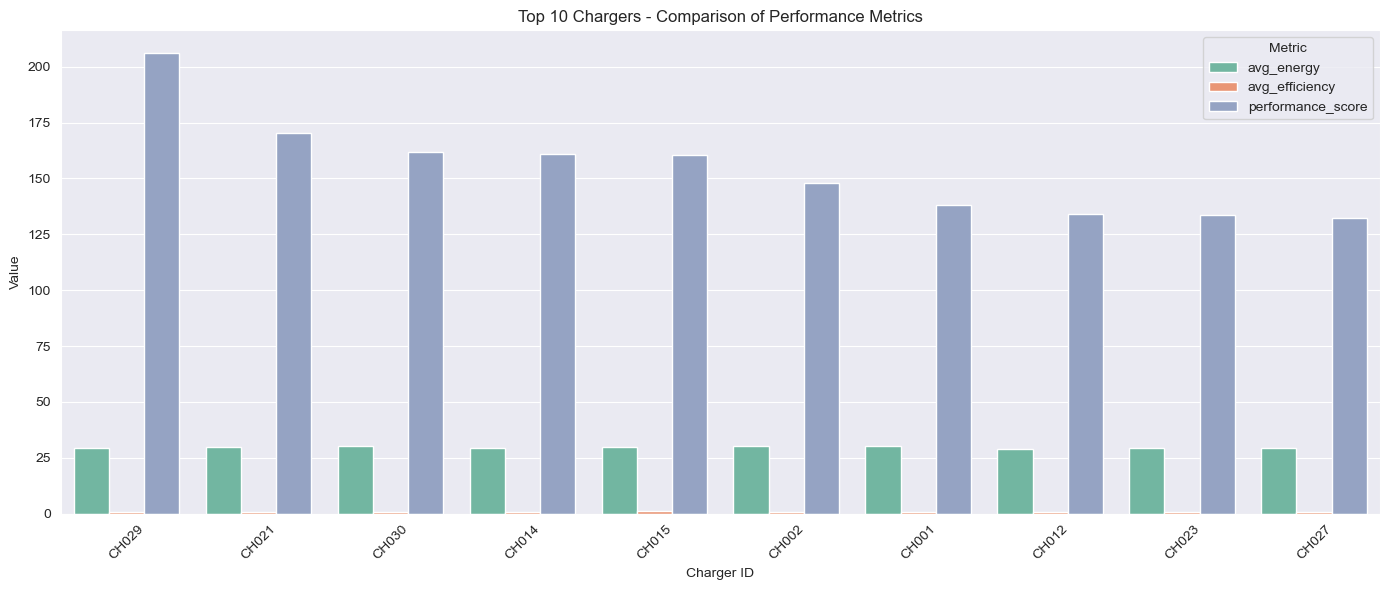

In [27]:
# Reset index so Charger_ID becomes a column
top_chargers_reset = top_chargers.reset_index()

# Melt the DataFrame to long format for seaborn
melted_df = top_chargers_reset.melt(
    id_vars='Charger_ID',
    value_vars=['avg_energy', 'avg_efficiency', 'performance_score'],
    var_name='Metric',
    value_name='Value'
)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=melted_df, x='Charger_ID', y='Value', hue='Metric', palette='Set2')

plt.title('Top 10 Chargers - Comparison of Performance Metrics')
plt.xlabel('Charger ID')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

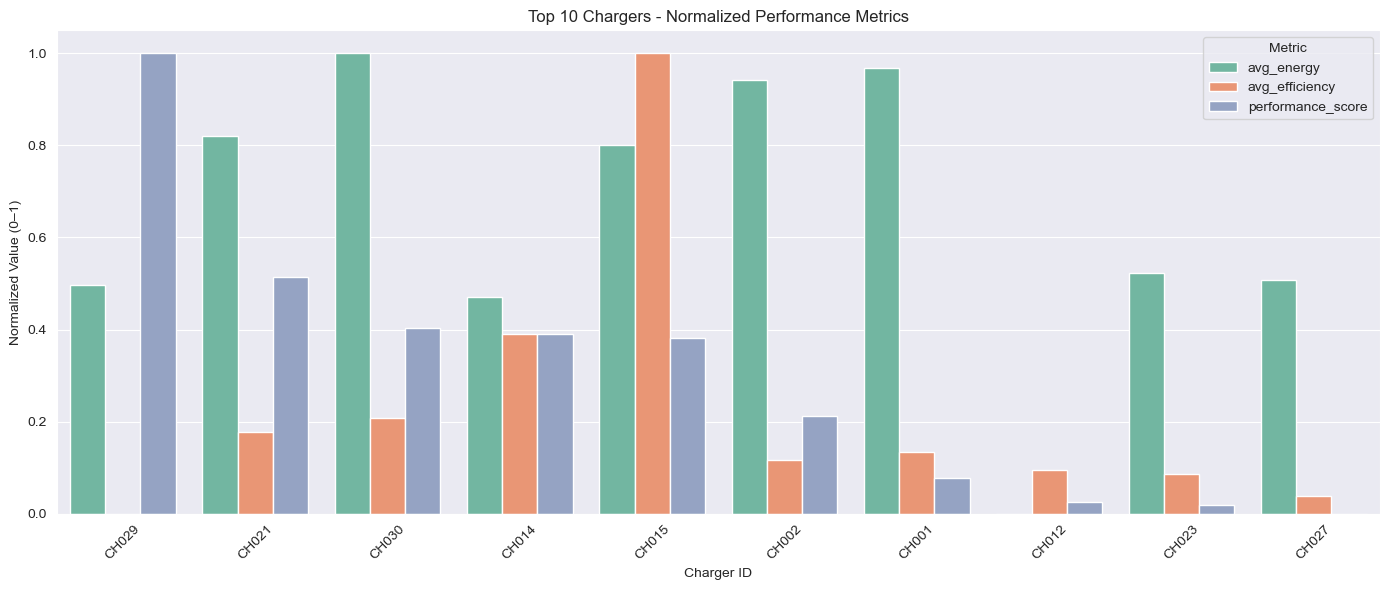

In [28]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index
top_chargers_reset = top_chargers.reset_index()

# Select the columns to normalize
metrics_to_normalize = ['avg_energy', 'avg_efficiency', 'performance_score']

# Apply Min-Max Scaling
scaler = MinMaxScaler()
top_chargers_reset[metrics_to_normalize] = scaler.fit_transform(top_chargers_reset[metrics_to_normalize])

# Melt for seaborn plotting
melted_df = top_chargers_reset.melt(
    id_vars='Charger_ID',
    value_vars=metrics_to_normalize,
    var_name='Metric',
    value_name='Normalized Value'
)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=melted_df, x='Charger_ID', y='Normalized Value', hue='Metric', palette='Set2')

plt.title('Top 10 Chargers - Normalized Performance Metrics')
plt.xlabel('Charger ID')
plt.ylabel('Normalized Value (0–1)')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


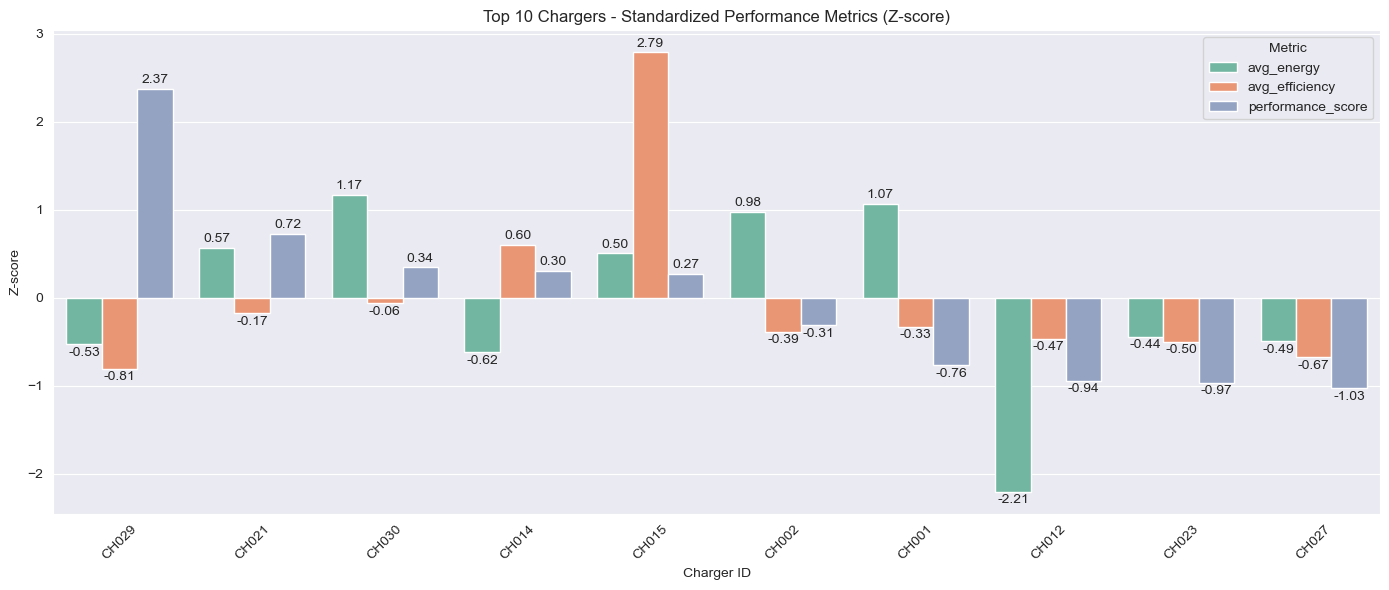

In [29]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Reset index
top_chargers_reset = top_chargers.reset_index()

# Metrics to standardize
metrics = ['avg_energy', 'avg_efficiency', 'performance_score']

# Apply Z-score Standardization
scaler = StandardScaler()
top_chargers_reset[metrics] = scaler.fit_transform(top_chargers_reset[metrics])

# Melt the DataFrame for seaborn
melted_df = top_chargers_reset.melt(
    id_vars='Charger_ID',
    value_vars=metrics,
    var_name='Metric',
    value_name='Standardized Value'
)

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=melted_df, x='Charger_ID', y='Standardized Value', hue='Metric', palette='Set2')

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=2)

plt.title('Top 10 Chargers - Standardized Performance Metrics (Z-score)')
plt.xlabel('Charger ID')
plt.ylabel('Z-score')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()

# Export plot as image
plt.savefig('top_chargers_standardized.png', dpi=300)
plt.show()


In [31]:

# Filter for rows where the charger is CH029
ch029_df = evse_df_cleaned[evse_df_cleaned['Charger_ID'] == 'CH029']

# Count unique vehicles that used CH029
unique_vehicles_ch029 = ch029_df['Vehicle_ID'].nunique()

print(f"Number of unique vehicles charged with CH029: {unique_vehicles_ch029}")



Number of unique vehicles charged with CH029: 24


In [32]:
vehicle_usage_ch029 = ch029_df['Vehicle_ID'].value_counts()
print("Vehicle usage with CH029:\n", vehicle_usage_ch029)


Vehicle usage with CH029:
 Vehicle_ID
EV038    45
EV006    40
EV022    35
EV042    26
EV007    22
EV037    21
EV041    21
EV023    20
EV008    18
EV003    17
EV046    16
EV049    15
EV005    14
EV040    14
EV033    14
EV029    10
EV035     8
EV011     8
EV039     7
EV014     6
EV045     6
EV021     4
EV002     3
EV013     1
Name: count, dtype: int64


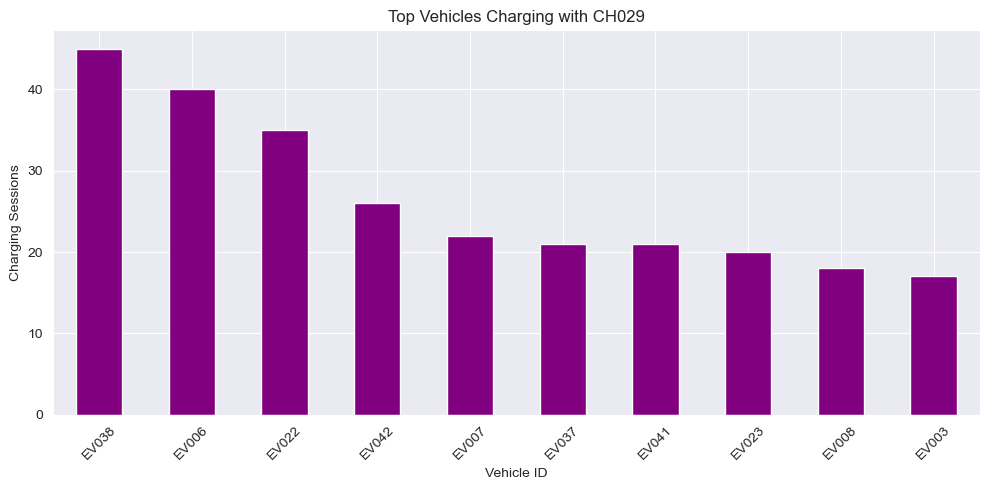

In [33]:

import matplotlib.pyplot as plt

vehicle_usage_ch029.head(10).plot(kind='bar', color='purple', figsize=(10,5))
plt.title('Top Vehicles Charging with CH029')
plt.xlabel('Vehicle ID')
plt.ylabel('Charging Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Filter for rows where the charger is CH015
ch015_df = evse_df_cleaned[evse_df_cleaned['Charger_ID'] == 'CH015']

# Count unique vehicles that used CH029
unique_vehicles_ch015 = ch015_df['Vehicle_ID'].nunique()

print(f"Number of unique vehicles charged with CH015: {unique_vehicles_ch015}")

Number of unique vehicles charged with CH015: 15


In [37]:
vehicle_usage_ch015 = ch015_df['Vehicle_ID'].value_counts()
print("Vehicle usage with CH015:\n", vehicle_usage_ch015)

Vehicle usage with CH015:
 Vehicle_ID
EV019    26
EV029    21
EV023    15
EV006    14
EV012    13
EV038    12
EV004    12
EV010     9
EV002     8
EV014     8
EV011     5
EV020     5
EV027     5
EV049     1
EV021     1
Name: count, dtype: int64


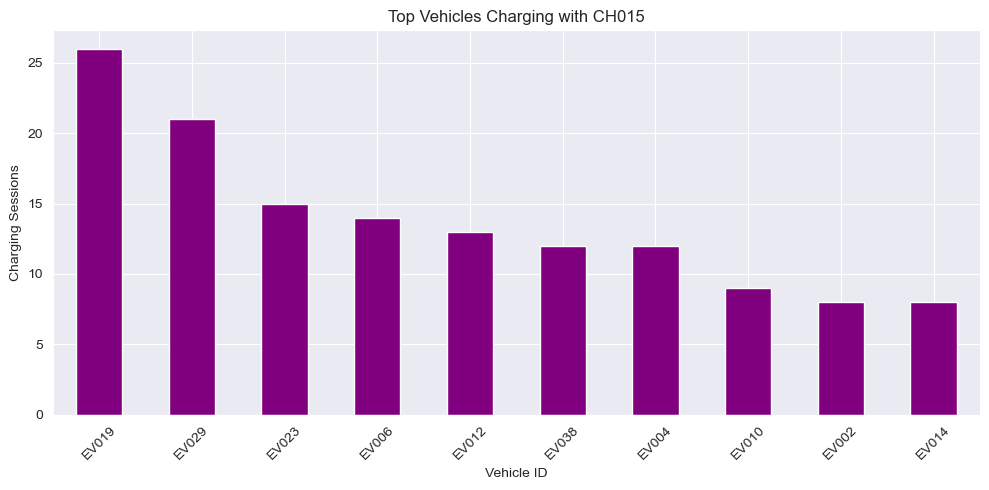

In [36]:
import matplotlib.pyplot as plt

vehicle_usage_ch015.head(10).plot(kind='bar', color='purple', figsize=(10,5))
plt.title('Top Vehicles Charging with CH015')
plt.xlabel('Vehicle ID')
plt.ylabel('Charging Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
# Filter for rows where the charger is CH015
ch015_df_and_ch029 = evse_df_cleaned[evse_df_cleaned['Charger_ID'] == 'CH015'and evse_df_cleaned['Charger_ID'] == 'CH029']

# Count unique vehicles that used CH029
unique_vehicles_ch015_and_ch029 = ch015_df_and_ch029['Vehicle_ID'].nunique()

print(f"Number of unique vehicles charged with CH015: {unique_vehicles_ch015_and_ch029}")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [39]:
ch015_and_ch029_df = evse_df_cleaned[
    (evse_df_cleaned['Charger_ID'] == 'CH015') | 
    (evse_df_cleaned['Charger_ID'] == 'CH029')
]
unique_vehicles = ch015_and_ch029_df['Vehicle_ID'].nunique()
print(f"Number of unique vehicles charged with CH015 or CH029: {unique_vehicles}")

Number of unique vehicles charged with CH015 or CH029: 30


In [40]:
vehicles_ch015 = set(evse_df_cleaned[evse_df_cleaned['Charger_ID'] == 'CH015']['Vehicle_ID'].unique())
vehicles_ch029 = set(evse_df_cleaned[evse_df_cleaned['Charger_ID'] == 'CH029']['Vehicle_ID'].unique())
common_vehicles = vehicles_ch015.intersection(vehicles_ch029)
print(f"Vehicles that used both CH015 and CH029: {len(common_vehicles)}")
print("Vehicle IDs:", common_vehicles)

Vehicles that used both CH015 and CH029: 9
Vehicle IDs: {'EV002', 'EV049', 'EV023', 'EV038', 'EV021', 'EV014', 'EV029', 'EV006', 'EV011'}


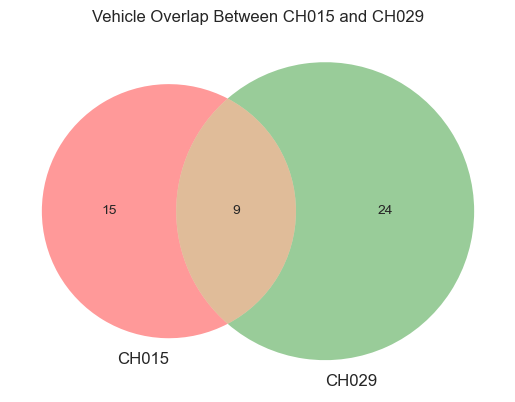

In [41]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

venn2(subsets=(len(vehicles_ch015), len(vehicles_ch029), len(common_vehicles)),
      set_labels=('CH015', 'CH029'))

plt.title("Vehicle Overlap Between CH015 and CH029")
plt.show()
